# Logistic Regression From Scratch

$p_i = P[y_i=1|x_i, \beta] = \displaystyle \frac{1}{1 + e^{- \beta^{T} x_i} }$

$loss(\beta) = \displaystyle -\frac{1}{N} \big(\sum_{i=1}^{N}y_i log(p_i) + (1 - y_i)log(1 - p_i)\big)$&emsp;&emsp;[unregularized]

$loss(\beta) = \displaystyle -\frac{1}{N}\big(\sum_{i=1}^{N}y_i log(p_i) + (1 - y_i)log(1 - p_i)\big) + \lambda\beta^T\beta$&emsp;&emsp;[regularized]

Relevent discussion on loss and derivative: https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression

In [1]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn import datasets
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
class LogisticRegression:
    def __init__(self, lr=0.01, epochs=100, l2=0.001):
        self.lr = lr
        self.epochs = epochs
        self.l2 = l2
        self.history = {'loss':[]}
    
    def predict_proba(self, X):
        probs = 1 / (1 + np.exp(-self.beta[0] - np.dot(X, self.beta[1:].reshape(-1, 1))))
        probs = probs.reshape(-1)
        return probs
    
    def loss(self, X, Y):
        probs = self.predict_proba(X)
        loss = -1*(np.sum(np.log(probs) * Y) + np.sum(np.log(1 - probs) * (1 - Y)) / X.shape[0]) + self.l2*np.dot(self.beta, self.beta)
        self.history['loss'].append(loss)
        return loss
        
    def grad(self, X, Y):
        g = (np.dot((self.predict_proba(X) - Y).reshape(-1, 1).T, np.hstack([np.ones((X.shape[0], 1)), X])).reshape(-1))/X.shape[0]
        return g
    
    def train(self, X, Y, print_every_n=10):
        N = X.shape[0]
        self.beta = np.zeros(1+X.shape[1])
        for epoch in range(self.epochs):
            self.beta = self.beta - self.lr*self.grad(X, Y)
            if (epoch+1)%print_every_n == 0:
                print("loss : {}".format(self.loss(X, Y)))

#### Dummy data

In [3]:
X = np.random.random((100, 10))
X[:, 0] = np.ones(X.shape[0]) # setting 1st column for intercept
Y = np.random.choice([0, 1], X.shape[0])

In [4]:
lr = LogisticRegression(lr=1.0, epochs=1000, l2=0)

In [5]:
lr.train(X, Y, print_every_n=50)

loss : 33.02698744572345
loss : 32.92167876072099
loss : 32.922924212551486
loss : 32.93132871692746
loss : 32.937600813020325
loss : 32.94177499071331
loss : 32.94454325481985
loss : 32.94640360064442
loss : 32.94767122428557
loss : 32.94854535610875
loss : 32.949154289544616
loss : 32.94958220332768
loss : 32.949885210164354
loss : 32.95010121012092
loss : 32.950256093129845
loss : 32.950367722882476
loss : 32.95044853698237
loss : 32.950507266531254
loss : 32.95055008651191
loss : 32.950581393489635


In [6]:
print(lr.beta)

[-0.14400912 -0.14400912 -0.19935466  1.03069122 -0.38056956  0.78616253
  0.51142996 -0.03245893 -0.70606394  0.05128206 -0.25783397]


#### Iris dataset

In [7]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
X_scaled = (X - X.mean(axis=0, keepdims=True))/np.std(X, axis=0, keepdims=True)
y = iris.target
y[y > 0] = 1

In [8]:
lr = LogisticRegression(lr=1.0, epochs=11, l2=0)
lr.train(X_scaled, y, print_every_n=50)

In [9]:
print(lr.beta)

[ 0.85705376  1.61613574 -1.29075476]


In [10]:
preds_scratch = lr.predict_proba(X_scaled)

In [11]:
roc_auc_score(y, preds_scratch)

0.9995999999999999

### scikit-learn LogisticRegression model

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
clf = LogisticRegression(random_state=0).fit(X_scaled, y)

In [14]:
print(clf.intercept_, clf.coef_, clf.n_iter_)

[2.09559393] [[ 3.26932025 -2.13108828]] [11]


In [15]:
preds = clf.predict_proba(X_scaled)

In [16]:
roc_auc_score(y, preds[:,1])

1.0

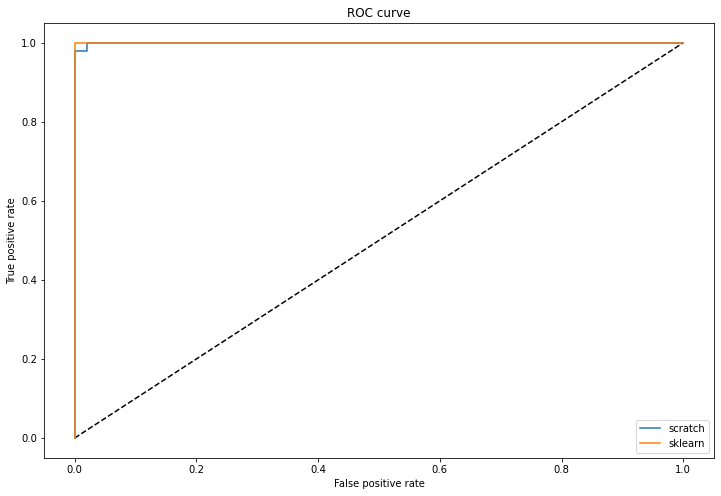

In [17]:
fpr_scratch, tpr_scratch, _ = roc_curve(y, preds_scratch)
fpr, tpr, _ = roc_curve(y, preds[:,1])

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_scratch, tpr_scratch, label='scratch')
plt.plot(fpr, tpr, label='sklearn')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

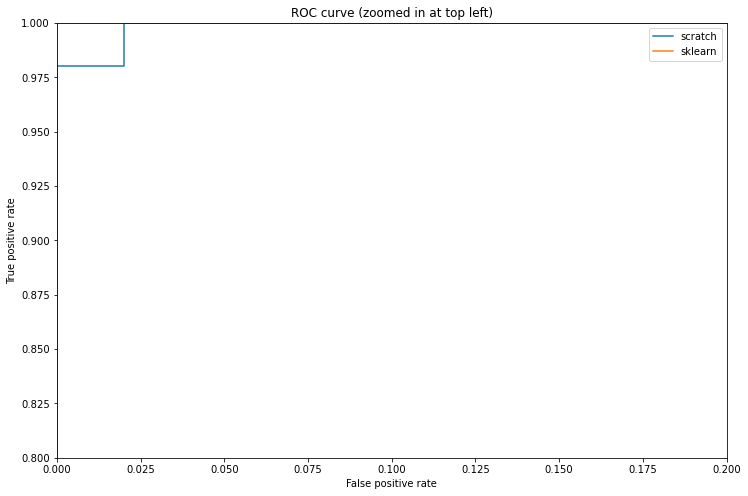

In [18]:
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_scratch, tpr_scratch, label='scratch')
plt.plot(fpr, tpr, label='sklearn')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

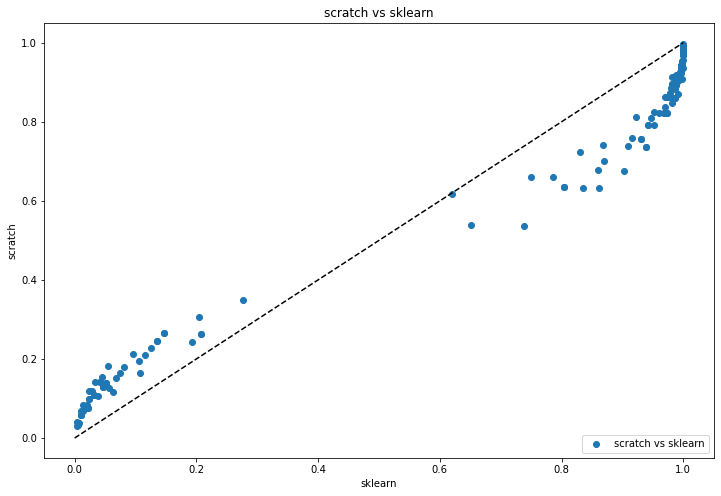

In [19]:
plt.figure(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(x=preds[:,1], y=preds_scratch, label='scratch vs sklearn')
plt.xlabel('sklearn')
plt.ylabel('scratch')
plt.title('scratch vs sklearn')
plt.legend(loc='lower right')
plt.show()